<a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_9_Single-band_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/bamacgabhann/GY4006/main/gy4006/assets/images/GY4006_logo_1.png" align=center alt="UL Geography logo"/>

# Single-band Raster Data

In the Introduction to Raster Data Notebook, we used the example of a photograph to introduce raster data stored as pixels.

However, photographs are not the only form of data which is best used in raster format. A photograph of the land surface can hold colour values in each pixel, but pixels aren't restricted to colours. Instead of colours, the value of each pixel can represent any data which varies discontinuously across an area. Examples include temperature data, rainfall, and the elevation of the land surface. Let's look at some examples.

**Important note**: unless you really want to learn the Python code, don't focus on trying to understand it - a lot of the plotting code tends to be quite fiddly. The concepts are what is important here, not how to do everything in Python. The same concepts apply to all GIS software.

## 1. Digital Elevation Models

In a digital elevation model (DEM), each pixel holds a value which represents the elevation of the ground surface.

A couple of important things to note. First of all, pixels are not points. Each pixel covers an *area* of the ground surface. The value is best thought of as the average elevation of the ground area covered by the pixel. As we saw in the Introduction to Raster Data notebook, the spatial resolution of raster data can vary considerably, and it's really important to ensure that you know the resolution of the source data. It's entirely possible to process the data such that the actual pixels cover smaller areas than the original data, but analyses which need higher resolution data won't become valid if you simply increase the number of pixels in low spatial resolution data.

Second, what do I mean by the ground surface? At first glance that seems obvious, but - say I have elevation data for an area which includes a forest. Is my elevation data measuring the top of the forest canopy, or the land underneath the trees? What about an area with buildings on it - are we including the tops of buildings, or are they removed from the dataset to show the surface as it would be without them?

The answer to this is that it varies. You can find all of these. In fact, digital elevation models are a key tool in forestry monitoring, where they'll want the top surface, but if you're doing geology the trees are just getting in your way and you don't need them. Similarly, urban geography often uses elevation models e.g. to track urban growth, but again if you want the natural surface, you don't want the buildings.

So, there are generally two categories of DEM. 

A *Digital Surface Model* or DSM will hold data on the elevation of whatever is the first surface to return data to the sensor. This will include forest canopies, buildings, bridges, and anything else present in the area big enough to return a value.

A *Digital Terrain Model* or DTM, on the other hand, will only have data for the underlying terrain, as the name suggests. 

It's worth taking a moment here to think about how DEM models, whether DSM or DTM, are constructed. It's possible to make a DEM by manually measuring elevation at a bunch of points and making what's called an *interpolation* between them. This basically means estimating what's in between known points. Although early topographic maps were essentially constructed in this way, it's really not practical for high resolution data.

Instead, high-resolution DEMs are constructed by collecting data from overhead surveys - by aircraft, by unmanned aerial vehicles (UAVs, commonly known as drones), or by satellite. The aircraft, UAV, or satellite will have a sensor which sends a signal to the ground, and measures the time taken for that signal to be reflected back to the sensor from different locations.

Two different kinds of sensor are used for DEMs. 

1. *RADAR*
    We're generally familiar with aircraft and ground stations using RADAR (Radio Detection And Ranging) to detect other aircraft by transmitting radio waves horizontally, and measure the time taken for the reflected signals to return. It's also possible to point a RADAR transmitter vertically, at the ground, and produce a DEM by measuring the signal which comes back. This can be done by any of aircraft, UAV, or satellite, but works best from satellite. (We'll come back to RADAR again, because it's useful for other things as well as DEMs.)

2. *LiDAR*
    Instead of radio waves, we can also point a laser at the ground and measure the reflection. LiDAR (*Light Detection and Ranging*) is not so possible from satellites due to the distance, how the signals spread out and weaken, and how light can be affected by travelling through the atmosphere, but from aircraft and UAVs it can produce very high resolution data. UL Geography has just acquired a UAV with a LiDAR camera for use in research projects.

The wavelength of radio waves is much longer than that of light - if you're not familiar with wavelength, it's not crucial to understand right now, just think of it as the size of the signal pulse. There's a few different wavelengths used, which are generally referred to as lettered bands. Many are just used for cilivian and/or military aviation and similar purposes and we don't need to explain them, but in geospatial research three bands are commonly used. C-band RADAR has a wavelength around 6cm; there's also the shorter wavelength X-band, around 3cm, and the longer wavelenth L-band, around 24cm. Even longer P-band (up to 1m) wavelengths are sometimes used, but much rarer.

Why I'm explaining this is that the shorter wavelength X-band RADAR signals are reflected by the tops of trees, while the longer wavelength L-band RADAR signals are too big to be reflected by individual leaves and branches, and so pass through forest canopies.

<img src="https://detektia.com/en/wp-content/uploads/sites/3/what-is-sar-synthetic-aperture-radar.jpeg" align=center alt="RADAR bands"/>

This is not something that's really crucial to consider most of the time, but it does mean that some RADAR DEMs will measure the terrain, while others will include the height of vegetation. 

LiDar, on the other hand, has a wavelength small enough to be reflected from leaves and branches. So, not only will it measure the top of the forest canopy, it will map details of that top surface.

Both LiDAR and RADAR will include buildings - so if you want a true DSM without any anthropogenic (human-made) structures, they have to be removed from the dataset. This is rarely perfect, and you'll commonly see remnants of buildings as artefacts in DSM models.

Publicly available global DEMs reach a resolution of down to around 30m per pixel. Data with higher spatial resolution is generally only available for specific smaller areas. 

LiDAR data for parts of Ireland can be found on the <a href="https://dcenr.maps.arcgis.com/apps/webappviewer/index.html?id=b7c4b0e763964070ad69bf8c1572c9f5">Open Topographic Data Viewer</a>, most of which has been collected by the OPW for flood risk and coastal monitoring purposes, and by TII (Transport Infrastructure Ireland) for road projects. 

RADAR DEMs covering Ireland are available from Copernicus (the EU's Earth Observation programme), specifically the <a href="https://sentinels.copernicus.eu/web/sentinel/-/copernicus-dem-new-direct-data-download-access">COP30 DEM</a>; the SRTM (Shuttle Radar Topography Mission) DEM available from the <a href="https://earthexplorer.usgs.gov/">USGS Earth Explorer</a>; and ALOS World 3D DEM, available from <a href="https://www.eorc.jaxa.jp/ALOS/en/dataset/aw3d30/aw3d30_e.htm">the Japanese space agency</a>. All have a spatial resolution of approximately 30m per pixel.

The example below uses the Digital Surface Model (DSM) of the COP30 DEM.

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install osmnx earthpy rasterio

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import osmnx as ox
import earthpy.spatial as es
import rasterio as rio
import rasterio.mask
from rasterio.plot import show
from rasterio import features
from rasterio.warp import calculate_default_transform, reproject, Resampling

First, we'll use ```rasterio``` to read in the DEM:

In [3]:
dem = rio.open(
    'https://raw.githubusercontent.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/DEM_COPERNICUS_30.tiff'
)

RasterioIOError: HTTP response code: 404

and let's have a look at how it's stored:

In [4]:
dem.read()

NameError: name 'dem' is not defined

So, this file holds elevation values in each pixel, and those values are stored as ```float32``` numbers. We can also see there's some pixels which don't have values - those are listed as ```nan```, which stands for ```Not A Number```. This is how the ```numpy``` library represents missing or non-numerical values.

In [5]:
dem.meta

NameError: name 'dem' is not defined

OK, now let's plot it and see what it looks like:

In [6]:
show(dem)

NameError: name 'dem' is not defined

In the previous notebook, ```rasterio``` was able to automatically detect that the satellite photographs were photographs, but here, it only has a single band of data, and so it uses a different colour scheme. We can specify what colour scheme to use.

Both QGIS and ArcGIS Pro will also allow specifying different colour schemes:

In [7]:
show(dem, cmap='Greens')

NameError: name 'dem' is not defined

Like GeoPandas, ```rasterio``` uses ```matplotlib``` to do the plotting of the map, so any colour map in matplotlib can be used. You can find the list here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

Some are quite specific:

In [8]:
show(dem, cmap='terrain')

NameError: name 'dem' is not defined

This is the right colour scheme, but it's showing land in blue - which is normally for oceans, of course. We can use some slightly more complex code to split the colour scheme:

(again, QGIS and ArcGIS will also allow getting more specific with the colour scheme)

In [9]:
import matplotlib.colors as colors
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list(
    'terrain_map', all_colors)
divnorm = colors.TwoSlopeNorm(vmin=0., vcenter=19, vmax=1000)

and use the new split *terrain_map* colour scheme to show the DEM. I split the two colour schemes at 19m, because the lake water level is 17-18m, so this will show the lake in blue:

NameError: name 'dem' is not defined

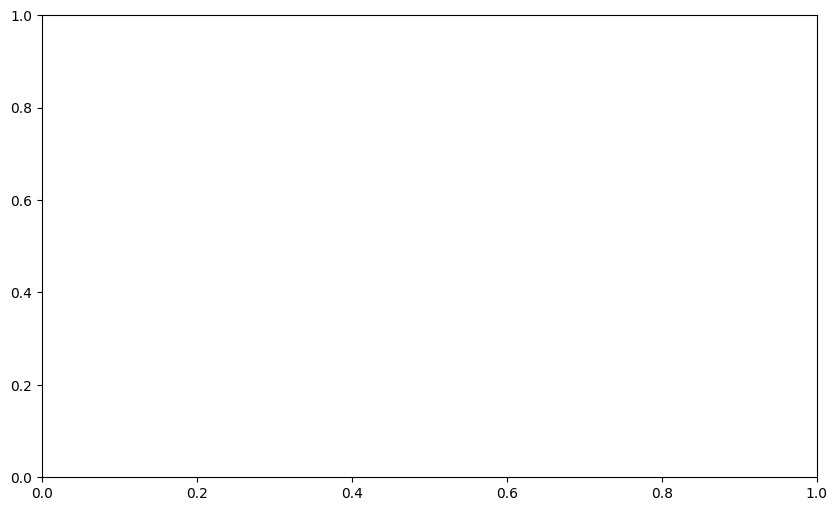

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
terrain = show(dem, ax=ax, cmap=terrain_map, norm=divnorm)
ax.ticklabel_format(style='plain')
plt.show()

Looking better. It would be better with a scalebar:

NameError: name 'dem' is not defined

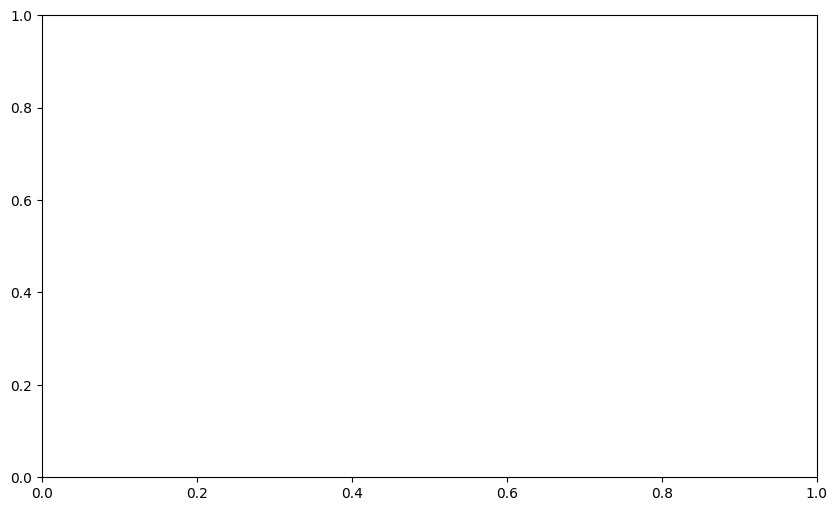

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

scale_setup = ax.imshow(dem.read()[0], cmap=terrain_map, norm=divnorm)
cb = fig.colorbar(scale_setup, ax=ax, extend='both', label="Elevation (m)")
cb.set_ticks([19, 0, 200, 400, 600, 800, 1000])

ax.ticklabel_format(style='plain')
show(dem, ax=ax, cmap=terrain_map, norm=divnorm)
plt.show()

## 2. DEM Hillshading

We can make the DEM look even more like topography by creating a hillshade - this simulates light from the sun coming from a certain direction and height to show lit areas and shadows, giving a 3D effect. To do this in Python, we'll use the library ```earthpy```. You can specify the azimuth (i.e. direction) and altitude (height) of the sun, both in degrees.

(Feel free to tweak these numbers and see how it changes the look of the map below. For reference if you do change them, my version has ```azimuth=270, altitude=30```.)

QGIS and ArcGIS also have hillshade options allowing you to adjust the azimuth and altitude for DEM data.

In [12]:
shade = es.hillshade(dem.read(1), azimuth=270, altitude=30)

NameError: name 'dem' is not defined

NameError: name 'shade' is not defined

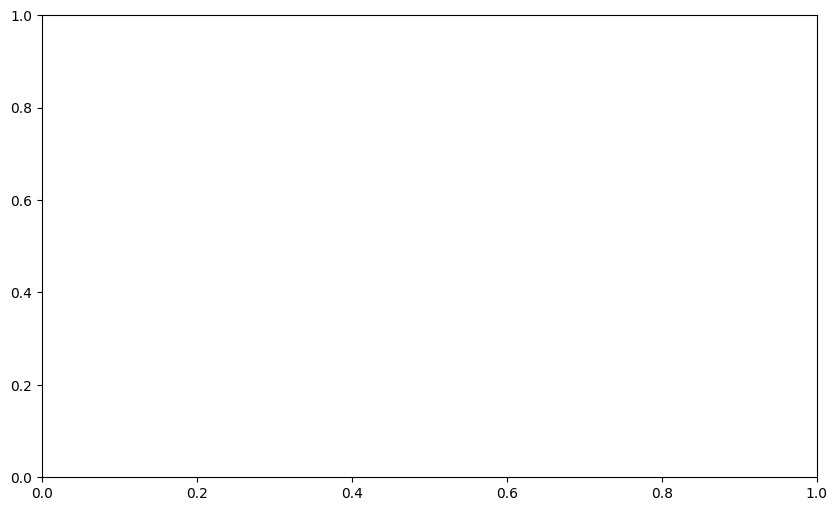

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
#scale_setup = ax.imshow(dem.read()[0], cmap=terrain_map, norm=divnorm)
#cb = fig.colorbar(scale_setup, ax=ax, extend='both', label="Elevation (m)")
#cb.set_ticks([19, 0, 200, 400, 600, 800, 1000])
ax.ticklabel_format(style='plain')
show(shade, transform=dem.transform, ax=ax, cmap="Greys")
plt.show()

And we can even layer the coloured version on top of the hillshaded version, by drawing the hillshade layer on top with 30% transparency (alpha=0.3).

Again, QGIS and ArcGIS can do this, and even have additional colour blending modes.

NameError: name 'dem' is not defined

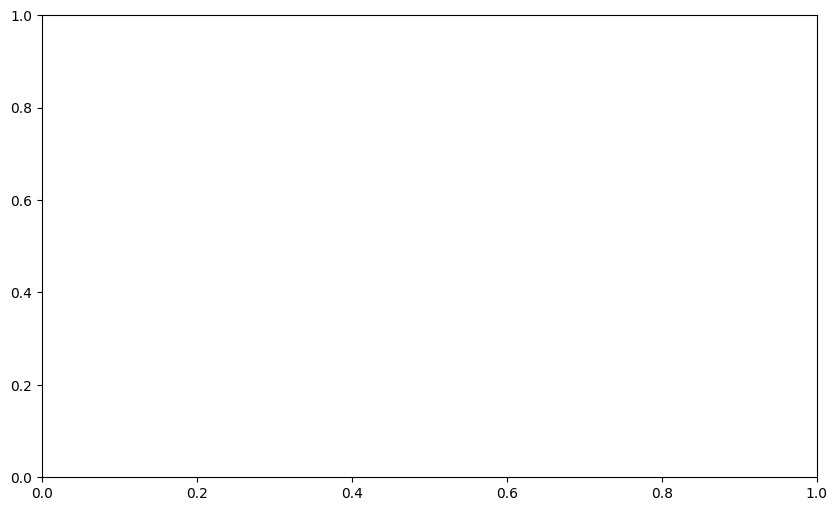

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
scale_setup = ax.imshow(dem.read()[0], cmap=terrain_map, norm=divnorm)
cb = fig.colorbar(scale_setup, ax=ax, extend='both', label="Elevation (m)")
cb.set_ticks([19, 0, 200, 400, 600, 800, 1000])
ax.ticklabel_format(style='plain')
show(dem, ax=ax, cmap=terrain_map, norm=divnorm)
show(shade, transform=dem.transform, ax=ax, cmap="Greys", alpha=0.3)
plt.show()

We could layer vector features on top of this. For example, let's grab the roads from OpenStreetMap, and plot them. We just need a little prep work to get the coordinates of the area covered by the DEM, and convert this from the UTM29N zone CRS EPSG:32629 to the global latitude-longitude CRS EPSG:4326 used by OpenStreetMap.

QGIS and ArcGIS will allow displaying of raster and vector data saved in mixed coordinate reference systems, and will do what is called an 'on the fly' transformation - meaning it transforms the data in memory to be in the same CRS, but without changing the saved files on disk.

In [15]:
bounds  = gpd.GeoDataFrame({"id": 1, "geometry":[box(*dem.bounds)]}).set_crs(32629)

NameError: name 'dem' is not defined

In [16]:
killarney_roads = ox.features_from_polygon(bounds.to_crs(4326)["geometry"][0], tags={"highway": True}).to_crs(32629)

NameError: name 'bounds' is not defined

NameError: name 'scale_setup' is not defined

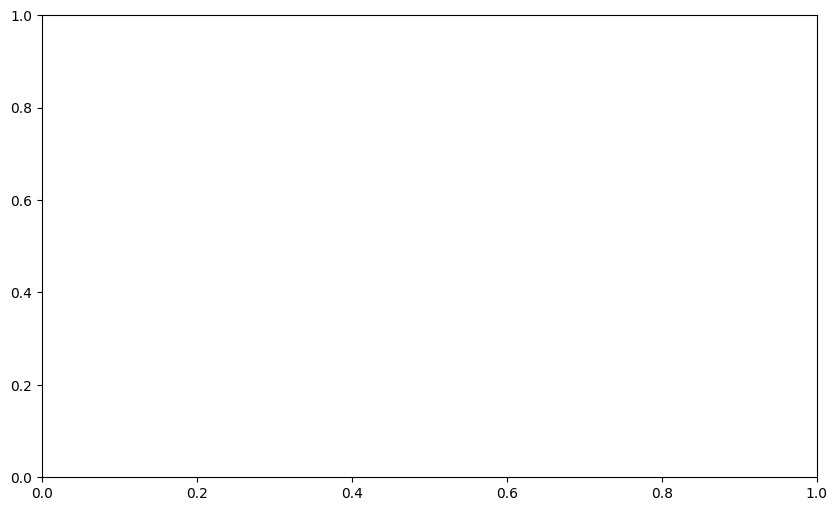

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
#scale_setup = ax.imshow(dem.read()[0], cmap=terrain_map, norm=divnorm)
cb = fig.colorbar(scale_setup, ax=ax, extend='both', label="Elevation (m)")
cb.set_ticks([19, 0, 200, 400, 600, 800, 1000])
ax.ticklabel_format(style='plain')
ax.set_xlim(452100, 467700)
ax.set_ylim(5758000, 5769500)
show(dem, ax=ax, cmap=terrain_map, norm=divnorm)
show(shade, transform=dem.transform, ax=ax, cmap="Greys", alpha=0.3)
killarney_roads.plot(ax=ax, column="highway", cmap="gist_yarg")
plt.show()

Or we could use satellite imagery instead of the topographic color map:

In [18]:
photo = rio.open(
    'https://raw.githubusercontent.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Killarney/2021-04-25_11-46-59_Sentinel-2_L2A_True_color.tiff'
)
fig, ax = plt.subplots(figsize=(10, 6))
ax.ticklabel_format(style='plain')
ax.set_xlim(452100, 467700)
ax.set_ylim(5758000, 5769500)
show(photo, ax=ax)
show(shade, transform=dem.transform, ax=ax, cmap="Greys", alpha=0.2)
killarney_roads.plot(ax=ax, column="highway", cmap="gist_yarg")
plt.show()

RasterioIOError: HTTP response code: 404

We could make this look nicer here, but I think that's enough to make the point, that you can combine plots of multiple raster and vector data sources. 

This might be a case where QGIS or ArcGIS is slightly easier to work with, because they will allow you to tweak the colours and symbols used for individual vector features a bit more easily than in Python, and there's easier options for overlaying maps on hillshade layers.


## 3. DEM Raster Geoprocessing

Elevation data isn't just for looking at, either. It can be particularly useful in the case of flood risk maps. Say the water level in the local river reaches 21m. In that case, we need to create a new array from the DEM layer, identifying areas where the DEM elevation is below 21m. 

If the elevation is above 21m, we don't need any data, and can set the value to a ```no data``` value. Because we're using float data, we can use NumPy's *Not a Number* (```np.NaN```) as our no data value.

We might also set elevation 19m or below as no data, because that's normally covered in water and so wouldn't be regarded as flooded.

Once we've done that, we can set a single value - which would normally be ```1```, incicating a Boolean ```True``` - for everywhere with elevation above 19m. Since we've already made the non-flooded areas NaN values, this will only be the areas where the elevation is between 19m and 21m.

In [19]:
flood = dem.read()
flood[flood>21]=np.NaN
flood[flood<19]=np.NaN
flood[flood>19]=1

NameError: name 'dem' is not defined

NameError: name 'scale_setup' is not defined

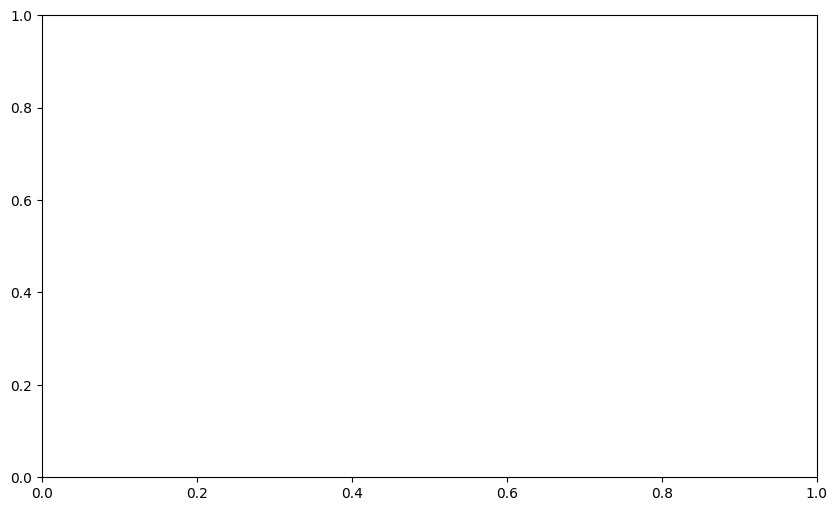

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
#scale_setup = ax.imshow(dem.read()[0], cmap=terrain_map, norm=divnorm)
cb = fig.colorbar(scale_setup, ax=ax, extend='both', label="Elevation (m)")
cb.set_ticks([19, 0, 200, 400, 600, 800, 1000])
ax.ticklabel_format(style='plain')
ax.set_xlim(452100, 467700)
ax.set_ylim(5758000, 5769500)
show(dem, ax=ax, cmap=terrain_map, norm=divnorm)
show(shade, transform=dem.transform, ax=ax, cmap="Greys", alpha=0.3)
show(flood, transform=dem.transform, ax=ax, cmap="tab20b")
killarney_roads.plot(ax=ax, column="highway", cmap="gist_yarg")
plt.show()

You can see a few dark blue areas close to the lake, at the edge of Killarney town, and smaller bits at the edges of rivers and lakes. Just a quick example.

## 4. Rasters and CRS: Temperature Data

As mentioned in the introduction, any data which varies discontinuously across an area is best used as raster data. Another example is temperature data. Let's have a look at global maximum land surface temperature data for April 2021 (I have a reason, wait for it) from <a href='https://www.worldclim.org/data/monthlywth.html'>WorldClim</a>.

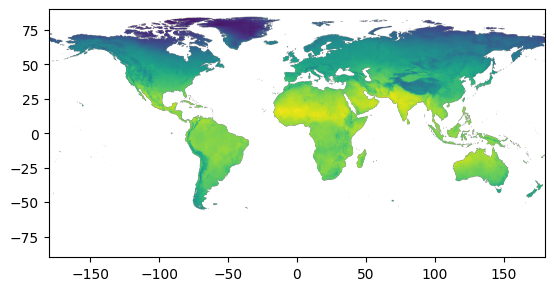

<Axes: >

In [21]:
temp = rio.open('zip+https://geodata.ucdavis.edu/climate/worldclim/2_1/hist/cts4.06/2.5m/wc2.1_cruts4.06_2.5m_tmax_2020-2021.zip!wc2.1_2.5m_tmax_2021-04.tif')
show(temp)

This is in the EPSG:4326 CRS, the global latitude-longitude system treated as X-Y coordinates (the first case example we looked at in the Coordinate Reference Systems notebook. We can of course reproject this to a different coordinate reference system. Doing so does, however, mean that we need to work out a new transform for our raster pixels - but rasterio has built-in functions for this, as will any GIS software.

In [22]:
dst_crs = '+proj=moll'

with rio.open('zip+https://geodata.ucdavis.edu/climate/worldclim/2_1/hist/cts4.06/2.5m/wc2.1_cruts4.06_2.5m_tmax_2020-2021.zip!wc2.1_2.5m_tmax_2021-04.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('./sample_data/wc2.1_2.5m_tmax_2021-04_moll.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rio.band(src, i),
                destination=rio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

RasterioIOError: Attempt to create new tiff file './sample_data/wc2.1_2.5m_tmax_2021-04_moll.tif' failed: No such file or directory

In [23]:
temp_moll = rio.open('./sample_data/wc2.1_2.5m_tmax_2021-04_moll.tif')
ocean = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/ocean.gpkg')
grid = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/LatLongGrid.gpkg')

ocean_moll = ocean.to_crs(crs='+proj=moll')
grid_moll = grid.to_crs(crs='+proj=moll')

fig, ax = plt.subplots(figsize = (10,6))

temp_scale_setup = ax.imshow(temp_moll.read()[0], cmap='coolwarm', vmin=-40, vmax=50)
cb = fig.colorbar(temp_scale_setup, ax=ax, extend='both', label="Temperature (°C)", shrink=0.6)
cb.set_ticks([-30, -20, -10, 0, 10, 20, 30, 40])
ocean_moll.plot(ax=ax, color='lightblue')
grid_moll.plot(ax=ax, color='white', linewidth=0.5)
show(temp_moll, ax=ax, cmap='coolwarm', vmin=-40, vmax=50)
ax.axis('off')

plt.show()


RasterioIOError: ./sample_data/wc2.1_2.5m_tmax_2021-04_moll.tif: No such file or directory

That looks a bit nicer, doesn't it? Much better way of presenting the data - using the Mollweide projection, and adding vector features for the oceans in light blue, and the global latitude-longitude grid in white. Plus, using the blue-red colourmap to illustrate the temperature is far more intuitive.



## 5. Masking and Cropping Rasters

Of course, while this is global temperature, it does also cover the region in Killarney we've been using so far. It's at a far lower resolution, but it does have a few pixels covering the region. Let's have a look - although, honestly, more because it demonstrates some points than because it's super useful.

To do this, first, we'll use the GeoDataFrame (called ```bounds```) containing a polygon shape of the raster DEM of the Killarney area (we created this earlier for getting the OpenStreetMap data), and use a global latitude-longitude CRS EPSG:4326 reprojection of this to extract the temperature data within that area.

```Rasterio``` refers to showing only part of an image as *masking*; and running mask with ```crop=True``` extracts the non-masked part of the data to a new dataset. That's what's happening in this code. It's also updating the ```meta``` information of the new cropped dataset, so that the shape and transform refer only to the cropped data, rather than the full original dataset.

In [24]:
with rio.open('zip+https://geodata.ucdavis.edu/climate/worldclim/2_1/hist/cts4.06/2.5m/wc2.1_cruts4.06_2.5m_tmax_2020-2021.zip!wc2.1_2.5m_tmax_2021-04.tif') as src:
    out_image, out_transform = rio.mask.mask(src, bounds.to_crs(4326).envelope, crop=True)
    out_meta = src.meta
    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})
with rio.open("./sample_data/wc2.1_2.5m_tmax_2021-04_K.tif", "w", **out_meta) as dest:
    dest.write(out_image)
tempK = rio.open("./sample_data/wc2.1_2.5m_tmax_2021-04_K.tif")
show(tempK)

NameError: name 'bounds' is not defined

Not many pixels, just 18 to cover the whole area (6 x 3) - but I'm trying to make a point. We'll get there. Now, to show this with the original image, we need to reproject it to the CRS used by the Killarney DEM - that's the UTM29N grid, EPSG:32629.

In [25]:
dst_crs = 'EPSG:32629'

with rio.open("./sample_data/wc2.1_2.5m_tmax_2021-04_K.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open("./sample_data/wc2.1_2.5m_tmax_2021-04_K_UTM29.tif", 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rio.band(src, i),
                destination=rio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

tempK = rio.open("./sample_data/wc2.1_2.5m_tmax_2021-04_K_UTM29.tif")
show(tempK)

RasterioIOError: ./sample_data/wc2.1_2.5m_tmax_2021-04_K.tif: No such file or directory

Now, here's what I want you to notice. The pixels now look pretty close to square - and count them! There's no longer just 18 - we now have a 5 x 4 shape with 20 pixels. And it looks like the pixels have been stretched in the vertical direction - the overall shape is much more square than it used to be.

I wanted with this to reinforce the point that while pixels are rectangular, and often displayed as square, on maps - that doesn't mean the area they cover on the ground is square. In fact, it *never* is, due to what we discussed in the Coordinate Reference Systems notebook: the impossibility of plotting a round surface of the Earth on a flat map or computer screen. 

Also, the pixels haven't actually been stretched - the values have actually been resampled into a new set of pixels in the new coordinate reference system, which most closely matches the new coordinate reference system. This means that some of the pixels will actually be covering a different area - so, a small warning about reprojections of low-resolution data. 

Still, let's see what it looks like on our Killarney DEM map:

NameError: name 'tempK' is not defined

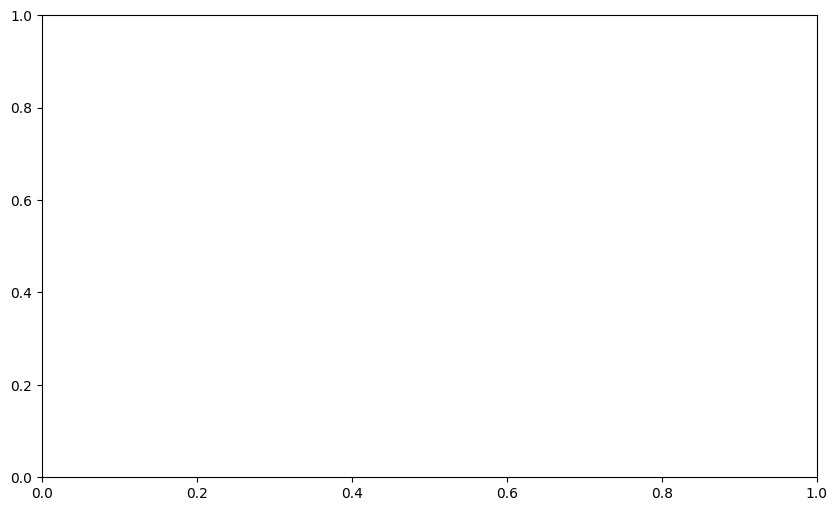

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

temp_scale_setup = ax.imshow(tempK.read()[0], cmap='coolwarm', vmin=-40, vmax=50)
cb = fig.colorbar(temp_scale_setup, ax=ax, extend='both', label="Temperature (°C)", shrink=0.6)
cb.set_ticks([-30, -20, -10, 0, 10, 20, 30, 40])

ax.ticklabel_format(style='plain')
ax.set_xlim(452100, 467700)
ax.set_ylim(5758000, 5769500)

show(tempK, ax=ax, cmap='coolwarm', vmin=-40, vmax=50)
show(shade, transform=dem.transform, ax=ax, cmap="Greys", alpha=0.3)
killarney_roads.plot(ax=ax, column="highway", cmap="gist_yarg")

plt.show()

So, only the southeasternmost pixel very noticeably showing as different, although there are some minor variations. 


## 6. Raster Coregistration


Hopefully I have made the point about the area on the ground represented by pixels - but it is still the case that the temperature data has pixels which are much larger than the pixels of the DEM. Now, in this case, we don't actually need to do any complex analysis comparing these two layers - but you *might* want to do that. And if so, you would not want what you have here.

Remember that when we reprojected the temperature data to this CRS, we ended up with 5 x 4 pixels instead of 6 x 3? That's because the data was resampled to a pixel size and shape which suited the new CRS. But if we're resampling the data anyway, why not just resample to exactly the same pixel size and shape as the DEM data?

This is referred to as *coregistration* of rasters, where we match a second raster to the extent and resolution of a first.

In [27]:
dst_crs = dem.crs
dst_width = dem.width
dst_height = dem.height
dst_bounds = dem.bounds

with rio.open("./sample_data/wc2.1_2.5m_tmax_2021-04_K.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, dst_width=dst_width, dst_height=dst_height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open("./sample_data/wc2.1_2.5m_tmax_2021-04_K_coreg.tif", 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rio.band(src, i),
                destination=rio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

NameError: name 'dem' is not defined

In [28]:
tempK_coreg = rio.open("./sample_data/wc2.1_2.5m_tmax_2021-04_K_coreg.tif")

fig, ax = plt.subplots(figsize=(10, 6))

temp_scale_setup = ax.imshow(tempK_coreg.read()[0], cmap='coolwarm', vmin=-40, vmax=50)
cb = fig.colorbar(temp_scale_setup, ax=ax, extend='both', label="Temperature (°C)", shrink=0.6)
cb.set_ticks([-30, -20, -10, 0, 10, 20, 30, 40])

ax.ticklabel_format(style='plain')
ax.set_xlim(452100, 467700)
ax.set_ylim(5758000, 5769500)

show(tempK_coreg, ax=ax, cmap='coolwarm', vmin=-40, vmax=50)
show(shade, transform=dem.transform, ax=ax, cmap="Greys", alpha=0.3)
killarney_roads.plot(ax=ax, column="highway", cmap="gist_yarg")

plt.show()

RasterioIOError: ./sample_data/wc2.1_2.5m_tmax_2021-04_K_coreg.tif: No such file or directory

It looks very similar - well, it should, it's the same data plotted in the same way, just with a different pixel size. But, check the southeasternmost corner in this and the previous map, and you will see the difference. We can also see a difference if we look at the numpy arrays behind the scenes:

In [29]:
# Previous transform
print(f'Previous array shape: {tempK.shape}')
tempK.read()

NameError: name 'tempK' is not defined

In [30]:
# This transform
print(f'This array shape: {tempK_coreg.shape}')
tempK_coreg.read()

NameError: name 'tempK_coreg' is not defined

383 x 516 pixels is a huge increase on 4 x 5.

So, we can see that different transforms do make a big difference, and it is best to match the pixel size of rasters if we want to do any comparisons.

But, it is also crucial to remember that we have *not* increased the spatial resolution of the data - only the spatial resolution at which it is displayed. The spatial resolution of the data is the spatial resolution of the source data - and that's best seen in the original 6 x 3 pixel grid when we first cropped the temperature data to the Killarney area. 

## Summary

So, we've seen here that we can use single-band rasters as digital elevation models, plotting on maps them using colour scales, and as hillshades, or both, and can layer vector data over them. We can also use the elevation values in calculations, including making flood risk maps.

We've also seen that we can use other data, such as temperatures, and used that data to try and understand pixel size and shape in rasters, particularly when combining datasets in different coordinate reference systems from different sources.

The key takeaways here are using raster data for elevation and data like temperatures, the concept that we can do calculations with the data beyond just showing it on maps, and that we have to be a bit careful when using multiple rasters - matching CRS and resolution in order to do calculations, but bearing in mind that increasing the number of pixels doesn't increase the spatial resolution of the data.

___

GY4006 Notebooks in Colab: 

2. Data Types <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_2_Data_Types.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Vector Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_3_Vector_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. Attribute Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_4_Attribute_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5. Coordinate Reference Systems <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_5_Coordinate_Reference_Systems.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6. Geospatial Data Files <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_6_Geospatial_Data_Files.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7. Vector Geoprocessing <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_7_Vector_Geoprocessing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8. Introduction to Raster Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_8_Introduction_To_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

9. Single-band Raster Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_9_Single-band_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10. Multi-band Raster Data: Passive Remote Sensing <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_10_Multi-band_Raster_Data-Passive_Remote_Sensing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>